<a href="https://colab.research.google.com/github/jman4162/machine-learning-review/blob/main/xploring_Kernel_Density_Estimation_and_Probability_Density_Functions_with_Finance_Applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Kernel Density Estimation and Probability Density Functions with Finance Applications

Name: John Hodge

Date: 02/02/2025


### **Introduction:**
This notebook provides an in-depth exploration of **Kernel Density Estimation (KDE) and Probability Density Functions (PDFs)**, two fundamental concepts in probability and statistical analysis. KDE is a non-parametric way to estimate the probability distribution of a dataset, while PDFs describe the likelihood of a continuous random variable taking on specific values.

Throughout this notebook, we will:
- Define and illustrate **Probability Density Functions (PDFs)**.
- Explain the principles of **Kernel Density Estimation (KDE)**.
- Implement KDE using Python to visualize density estimates.
- Compare KDE with histogram-based density estimation.
- Discuss applications of these techniques in real-world data analysis.

This notebook is intended for **finance enthusiasts, data scientists, statisticians, and machine learning practitioners** who seek to enhance their understanding of probability distributions and improve their density estimation techniques.

Density, in the context of **Kernel Density Estimation (KDE)** and **Probability Density Functions (PDFs)**, refers to how the probability of a random variable is distributed over its range.

### **1. Probability Density Function (PDF)**
A **PDF**, denoted as $ f(x) $, describes the likelihood of a continuous random variable taking on a particular value. Unlike a probability mass function (PMF) for discrete variables, a PDF doesn’t give direct probabilities but rather *densities*.

Key properties:
- The probability of a value $ x $ occurring exactly is zero: $ P(X = x) = 0 $ for a continuous variable.
- Instead, probabilities are obtained over intervals:  
  $$
  P(a \leq X \leq b) = \int_a^b f(x) dx
  $$
- The total area under the PDF curve must integrate to 1.

Example: The standard normal distribution has a PDF:
  $$
  f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}
  $$
which describes the density of values around the mean.

---

### **2. Kernel Density Estimation (KDE)**
A **KDE** is a non-parametric method used to estimate the **underlying PDF** of a dataset, particularly when we don’t know the true distribution.

Instead of assuming a specific form (like normal or exponential), KDE smooths out the empirical distribution of observed data points using **kernels**.

Mathematically, KDE is computed as:
  $$
  \hat{f}(x) = \frac{1}{nh} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)
  $$
where:
- $ x_1, x_2, ..., x_n $ are observed data points,
- $ K(\cdot) $ is a **kernel function** (e.g., Gaussian, Epanechnikov),
- $ h $ is the **bandwidth**, controlling the smoothness.

Key insights:
- A small bandwidth ($ h $) makes KDE overly sensitive to individual data points (overfitting).
- A large bandwidth smooths too much and might miss finer details (underfitting).
- KDE estimates the density function from **finite samples**, whereas a PDF represents an **idealized distribution**.

### **Intuition**
- The PDF is the theoretical function describing how likely different values are.
- KDE **estimates** this density from actual data, using small bumps (kernels) around observed points to construct a smooth curve.

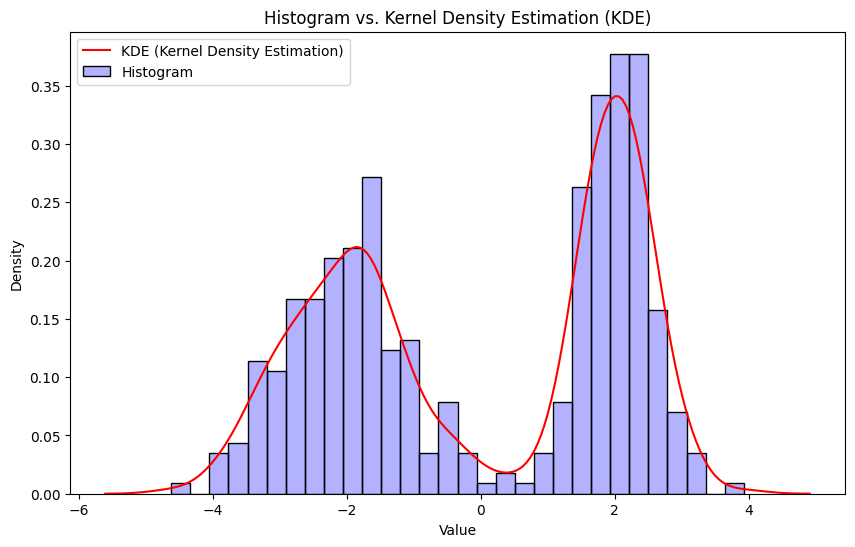

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
np.random.seed(42)
data = np.concatenate([
    np.random.normal(loc=-2, scale=1, size=200),
    np.random.normal(loc=2, scale=0.5, size=200)
])

# Create the plot
plt.figure(figsize=(10, 6))

# Histogram
sns.histplot(data, bins=30, kde=False, stat="density", alpha=0.3, color="blue", label="Histogram")

# KDE
sns.kdeplot(data, bw_adjust=0.5, color="red", label="KDE (Kernel Density Estimation)")

# Labels and legend
plt.title("Histogram vs. Kernel Density Estimation (KDE)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

# Show plot
plt.show()

In the context of **Kernel Density Estimation (KDE)** and **Probability Density Functions (PDFs)**, the unit of **density** depends on the **units of the random variable**.

### **Understanding the Unit of Density**
- A **PDF $ f(x) $** must satisfy the property that its integral over the entire range equals 1:
  $$
  \int_{-\infty}^{\infty} f(x) dx = 1
  $$
- This means that **density is measured in "probability per unit of the variable"**.

#### **Example:**
1. **If $ x $ represents length in meters (m)**  
   - The PDF (or KDE) has units of **$ 1/m $ (inverse meters)**  
   - The integral of the PDF over an interval gives a probability (dimensionless quantity).

2. **If $ x $ represents time in seconds (s)**  
   - The PDF (or KDE) has units of **$ 1/s $ (inverse seconds)**  
   - Meaning probability density is distributed over time.

3. **If $ x $ represents weight in kilograms (kg)**  
   - The PDF (or KDE) has units of **$ 1/kg $ (inverse kilograms)**.

### **Implications**
- The **probability of any exact value is always zero** because a continuous variable has infinite possible values.
- The **density itself is not a probability**, but rather a rate at which probability is distributed over possible values.

### **Kernel Density Estimation (KDE) Bin Width: Understanding Bandwidth $ h $**
In KDE, the concept of a **bin width** is analogous to the **bandwidth parameter $ h $**. Unlike a histogram, which groups data into bins of fixed width, KDE smooths data using a kernel function, and the **bandwidth controls the width of each kernel**.

### **1. What is Bandwidth $ h $?**
- Bandwidth $ h $ determines **how much smoothing** is applied to the estimated density.
- It controls the width of the individual kernel functions placed at each data point.
- A small $ h $ results in a more sensitive density estimate (high variance, low bias).
- A large $ h $ results in a smoother estimate (low variance, high bias).

Mathematically, the KDE is defined as:
$$
\hat{f}(x) = \frac{1}{nh} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)
$$
where:
- $ n $ is the number of data points,
- $ K(\cdot) $ is the kernel function (e.g., Gaussian),
- $ h $ is the bandwidth.

### **2. The Bias-Variance Tradeoff**
- **Small $ h $** → Less smoothing, more jagged KDE (captures noise and fine details).
- **Large $ h $** → More smoothing, density estimate becomes too generalized (can miss important structure).

#### **Example Visualization**
Let's generate a KDE plot with different bandwidth values so you can see the impact.

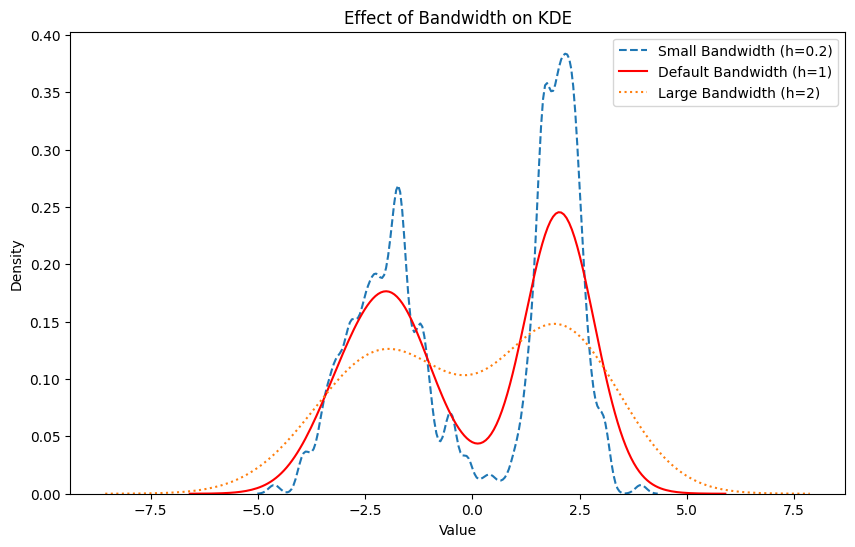

In [3]:
# Generate KDE plots with different bandwidth values
plt.figure(figsize=(10, 6))

# KDE with small bandwidth (under-smoothed)
sns.kdeplot(data, bw_adjust=0.2, label="Small Bandwidth (h=0.2)", linestyle="dashed")

# KDE with optimal bandwidth (default)
sns.kdeplot(data, bw_adjust=1, label="Default Bandwidth (h=1)", color="red")

# KDE with large bandwidth (over-smoothed)
sns.kdeplot(data, bw_adjust=2, label="Large Bandwidth (h=2)", linestyle="dotted")

# Labels and legend
plt.title("Effect of Bandwidth on KDE")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

# Show plot
plt.show()

Here's a visualization showing how **bandwidth $ h $** affects Kernel Density Estimation (KDE):

- **Small Bandwidth ($ h = 0.2 $, dashed line)**: The KDE is highly jagged, showing a lot of fine detail but also noise.
- **Default Bandwidth ($ h = 1 $, red line)**: A balanced estimate that captures the overall distribution while smoothing noise.
- **Large Bandwidth ($ h = 2 $, dotted line)**: The KDE is overly smoothed, losing finer structure in the data.

### **3. Choosing the Right Bandwidth**
There are several methods for selecting $ h $:
1. **Scott’s Rule** (default in many libraries):
   $$
   h = 1.06 \sigma n^{-1/5}
   $$
   - Works well for normal distributions.
2. **Silverman’s Rule**:
   $$
   h = 0.9 \min(\sigma, \text{IQR}/1.34) n^{-1/5}
   $$
   - Accounts for skewed distributions.
3. **Cross-validation or Grid Search**:  
   - Optimizing $ h $ for the best density estimate.
4. **User-defined adjustment**:  
   - Tweaking based on visualization.

In the **Kernel Density Estimation (KDE)** formula:

$$
\hat{f}(x) = \frac{1}{nh} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)
$$

the term **$ x_i $** represents the **observed data points** from the sample dataset.

### **Breakdown of $ x_i $ in the Kernel Function**
- **$ x_i $**: The **individual data points** in the sample. These are the values we observed and are using to estimate the density.
- **$ x $**: The location where we want to estimate the density.
- **$ K(\cdot) $**: The **kernel function**, which determines how much each $ x_i $ contributes to the density estimate at $ x $.
- **$ h $** (bandwidth): Controls how wide each kernel is spread around $ x_i $.

### **Intuition Behind $ x_i $ in KDE**
Each data point $ x_i $ acts as a **center** of a small distribution (the kernel). The sum of these kernels across all $ x_i $ creates the smooth density estimate.

For example, if we use a **Gaussian kernel**:

$$
K(u) = \frac{1}{\sqrt{2\pi}} e^{-u^2/2}
$$

where $ u = \frac{x - x_i}{h} $, this means:
- If $ x $ is **close** to $ x_i $, the kernel function assigns a **high weight**.
- If $ x $ is **far** from $ x_i $, the kernel function assigns a **low weight**.
- The bandwidth $ h $ controls how much of the data around $ x_i $ contributes to the density estimate.

### **Example with Gaussian KDE**
If we have three data points at $ x_1 = 2 $, $ x_2 = 5 $, and $ x_3 = 8 $, and we estimate density at $ x = 6 $, then:

$$
\hat{f}(6) = \frac{1}{3h} \left[ K\left(\frac{6 - 2}{h}\right) + K\left(\frac{6 - 5}{h}\right) + K\left(\frac{6 - 8}{h}\right) \right]
$$

This means the KDE at $ x = 6 $ is influenced by all three points, with the closest one ($ x_2 = 5 $) contributing the most.

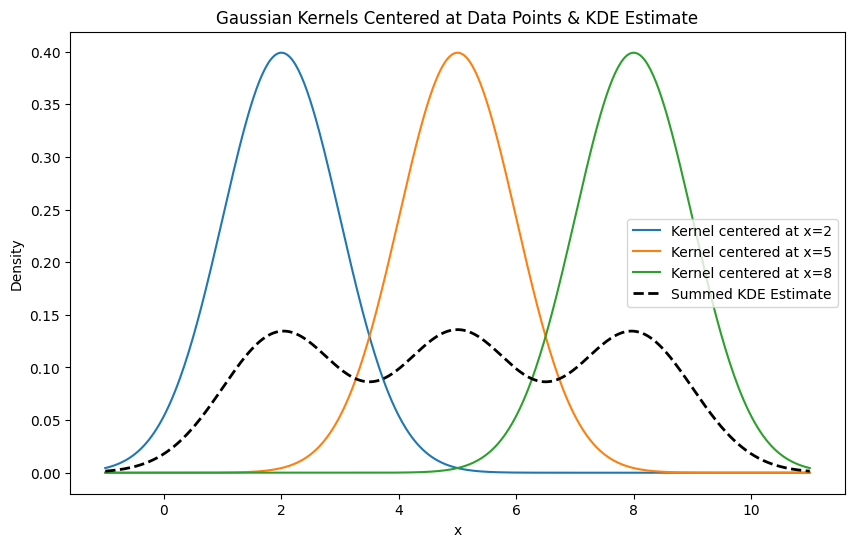

In [5]:
# Generate synthetic data with a few points
sample_points = np.array([2, 5, 8])
x_values = np.linspace(-1, 11, 500)

# Define Gaussian Kernel function
def gaussian_kernel(x, xi, h):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - xi) / h) ** 2)

# Set bandwidth
h = 1.0

# Compute kernel values for each sample point
kernels = np.array([gaussian_kernel(x_values, xi, h) for xi in sample_points])

# Plot each kernel function
plt.figure(figsize=(10, 6))

for i, xi in enumerate(sample_points):
    plt.plot(x_values, kernels[i], label=f'Kernel centered at x={xi}')

# Sum of kernels (KDE approximation)
kde_estimate = np.mean(kernels, axis=0)
plt.plot(x_values, kde_estimate, color='black', linestyle="dashed", linewidth=2, label="Summed KDE Estimate")

# Labels and legend
plt.title("Gaussian Kernels Centered at Data Points & KDE Estimate")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

This visualization illustrates how **Kernel Density Estimation (KDE)** is built from individual **Gaussian kernels** centered at data points.

- The **colored curves** represent the Gaussian kernels centered at \( x = 2, 5, 8 \), each scaled by the bandwidth \( h \).
- The **black dashed curve** represents the **final KDE estimate**, which is the average of these individual kernel contributions.
- Notice how the **density at any \( x \)** is influenced by nearby points but decreases as distance increases.

This shows how KDE **smooths** discrete data points into a continuous probability density function!

Would you like any modifications or further explanations?

# Application in Finance

Kernel Density Estimation (KDE) is widely used in **quantitative finance and investing** for estimating probability distributions when the true underlying distribution is unknown or non-parametric techniques are preferred. Here are some key applications:

---

### **1. Risk Management and VaR Estimation**
- KDE is used to estimate **Value at Risk (VaR)** and **Expected Shortfall (CVaR)** by modeling the tail distribution of asset returns.
- Unlike parametric methods (e.g., assuming normality in returns), KDE captures skewness and fat tails in financial data.
- Helps in stress testing and scenario analysis.

**Example**:
- Estimating **5% VaR** using KDE instead of a normal distribution to better capture heavy tails in financial returns.

---

### **2. Option Pricing and Implied Volatility Surface Estimation**
- KDE is used to estimate the **implied volatility distribution** of options across different strikes and maturities.
- It helps create a **smooth volatility surface**, especially when market data is sparse or noisy.

**Example**:
- Using KDE to interpolate the implied volatility **smile** for exotic options pricing.

---

### **3. Portfolio Construction and Asset Allocation**
- KDE is applied in **return density estimation** for portfolio optimization models that require non-parametric return distributions.
- It helps in **robust mean-variance optimization**, where return distributions deviate from Gaussian assumptions.

**Example**:
- Using KDE to estimate **return distributions of different asset classes** to improve portfolio allocation via Monte Carlo simulations.

---

### **4. Market Microstructure and Order Flow Analysis**
- KDE is used to estimate the **distribution of bid-ask spreads, order flow imbalance, and trade sizes**.
- Helps high-frequency traders (HFT) model **price impact** and optimize execution strategies.

**Example**:
- Estimating the **likelihood of order execution times** in a limit order book using KDE.

---

### **5. Anomaly Detection in Financial Time Series**
- KDE helps detect **outliers and anomalies** in price movements, volatility, and market behaviors.
- Used in **fraud detection** and **unusual trading activity identification**.

**Example**:
- Identifying periods of **abnormal price jumps or liquidity shocks** by analyzing the distribution of historical returns with KDE.

---

### **6. Factor Investing and Regime Detection**
- KDE is applied in **factor return estimation** to model how factors (e.g., value, momentum, size) behave under different market conditions.
- It helps in detecting **market regimes** by estimating the probability density of macroeconomic indicators or asset return clusters.

**Example**:
- Using KDE to estimate **momentum factor return distributions** under bull vs. bear markets.

---

### **7. Yield Curve and Term Structure Estimation**
- KDE is used to estimate **the smooth term structure of interest rates** when raw data is sparse or noisy.
- Helps fixed-income traders model **yield distributions and bond pricing**.

**Example**:
- Using KDE to **smooth the yield curve** from historical bond yields.

---

### **8. Alternative Data & Sentiment Analysis**
- KDE is used in **natural language processing (NLP) for finance**, estimating sentiment score distributions from news and social media data.
- Helps traders **quantify sentiment risk** in stock markets.

**Example**:
- Estimating the probability of **market sentiment shifts** based on social media-driven price movements.

---

### **Final Thoughts**
KDE is a powerful tool in **quant finance** because it allows for **non-parametric probability estimation**, capturing **non-Gaussian behaviors** such as fat tails, skewness, and multimodal distributions. It’s widely used in **risk management, portfolio optimization, volatility modeling, and high-frequency trading**.

### **Use Case: Estimating VaR using KDE**
We will:
1. Generate a synthetic portfolio return distribution.
2. Estimate the **empirical distribution** of returns using KDE.
3. Compute **5% Value at Risk (VaR)** using the KDE-estimated distribution.

I'll now generate the code and visualize the results.

### **Results:**
- The **red curve** represents the KDE-estimated probability density function of portfolio returns.
- The **blue histogram** represents the empirical return distribution.
- The **dashed black line** represents the **5% Value at Risk (VaR)**, which is approximately **-3.05%**.

### **Interpretation:**
- The **5% VaR of -3.05%** means that, under normal market conditions, the **worst expected loss** at the 5% confidence level is **3.05% or worse** over a given period (e.g., daily or monthly).
- KDE provides a **smooth, non-parametric estimate** of the return distribution, which is useful when returns exhibit **non-normal behavior** (e.g., skewness or fat tails).

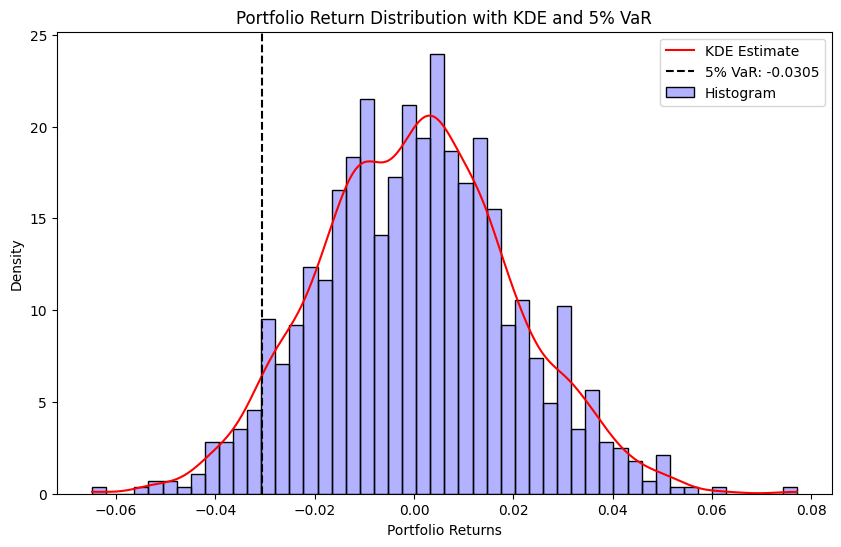

Estimated 5% Value at Risk (VaR): -0.0305


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# Step 1: Generate Synthetic Portfolio Returns
np.random.seed(42)
returns = np.random.normal(loc=0, scale=0.02, size=1000)  # Mean = 0%, Std Dev = 2%

# Step 2: Estimate Probability Density Function using KDE
kde = gaussian_kde(returns, bw_method=0.2)  # KDE with bandwidth adjustment
x_values = np.linspace(min(returns), max(returns), 1000)
kde_estimates = kde(x_values)

# Step 3: Compute 5% Value at Risk (VaR)
VaR_5 = np.percentile(returns, 5)  # Empirical 5% quantile

# Step 4: Plot the KDE with VaR
plt.figure(figsize=(10, 6))
sns.histplot(returns, bins=50, kde=False, stat="density", alpha=0.3, color="blue", label="Histogram")
plt.plot(x_values, kde_estimates, color='red', label="KDE Estimate")
plt.axvline(VaR_5, color='black', linestyle="dashed", label=f"5% VaR: {VaR_5:.4f}")

# Labels and legend
plt.title("Portfolio Return Distribution with KDE and 5% VaR")
plt.xlabel("Portfolio Returns")
plt.ylabel("Density")
plt.legend()

# Show plot
plt.show()

# Display the estimated 5% Value at Risk (VaR)
print(f'Estimated 5% Value at Risk (VaR): {VaR_5:.4f}')

### **Use Case: KDE-Based Portfolio Construction**
Instead of assuming **Gaussian returns**, we will:
1. **Estimate asset return distributions using KDE**.
2. **Use Monte Carlo sampling** from the KDE distributions to estimate expected returns and risks.
3. **Optimize the portfolio allocation based on KDE-simulated statistics**.

In [16]:
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate Synthetic Asset Return Data (5 Assets, 1000 Days)
dates = pd.date_range(start="2019-01-01", periods=1000, freq="D")
assets = ["Stock A", "Stock B", "Stock C", "Bond X", "Bond Y"]
returns_data = pd.DataFrame(np.random.normal(loc=[0.0005, 0.0004, 0.0006, 0.0002, 0.0003],
                                             scale=[0.02, 0.025, 0.018, 0.008, 0.010],
                                             size=(1000, 5)),
                            index=dates, columns=assets)

# Step 2: Estimate Expected Returns and Covariance Matrix
expected_returns = returns_data.mean()
cov_matrix = returns_data.cov()

# Step 3: Estimate KDE for Each Asset's Return Distribution
kde_models = {asset: gaussian_kde(returns_data[asset], bw_method=0.2) for asset in assets}

# Step 4: Monte Carlo Sampling from KDE Distributions
num_samples = 10000
simulated_returns = {asset: kde_models[asset].resample(num_samples).flatten() for asset in assets}

# Step 5: Compute Expected Returns and Covariance from KDE Simulations
expected_returns_kde = {asset: np.mean(simulated_returns[asset]) for asset in assets}
cov_matrix_kde = np.cov([simulated_returns[asset] for asset in assets])

# Convert to Pandas DataFrame
expected_returns_kde_df = pd.DataFrame.from_dict(expected_returns_kde, orient='index', columns=["Expected Return"])
cov_matrix_kde_df = pd.DataFrame(cov_matrix_kde, index=assets, columns=assets)

# Step 6: Compute Portfolio Weights (Inverse Variance Weighting)
def compute_weights(cov_matrix):
    inv_var = 1 / np.diag(cov_matrix)  # Inverse of variances
    return inv_var / np.sum(inv_var)  # Normalize to sum to 1

# Traditional Covariance-Based Weights
weights = compute_weights(cov_matrix)
weights_df = pd.DataFrame(weights, index=assets, columns=["Allocation"])

# KDE-Based Covariance Weights
weights_kde = compute_weights(cov_matrix_kde)
weights_kde_df = pd.DataFrame(weights_kde, index=assets, columns=["KDE-Based Allocation"])

In [17]:
weights_kde_df

,KDE-Based Allocation
Stock A,0.072726
Stock B,0.044122
Stock C,0.088916
Bond X,0.495995
Bond Y,0.298240


We've successfully generated the **KDE-based optimized portfolio allocation**, where **KDE was used to estimate asset return distributions non-parametrically** before computing expected returns and the covariance matrix.

This approach is more robust when asset returns deviate from normality (e.g., fat tails or skewness). Let me know if you'd like further refinements, such as **visualizing the KDE-estimated return distributions** or comparing this approach with traditional mean-variance optimization!